# Vaidya metric as from litrature

In [20]:
import sympy
import matplotlib.pyplot as plt
import numpy as np

from sympy import symbols, sin, cos, sinh
from einsteinpy.symbolic import EinsteinTensor, MetricTensor, WeylTensor, RicciTensor, RicciScalar

sympy.init_printing()

### Defining our time dependent metric as from equation 31
https://docs.einsteinpy.org/en/latest/examples/Symbolically%20Understanding%20Christoffel%20Symbol%20and%20Riemann%20Curvature%20Tensor%20using%20EinsteinPy.html

https://en.wikipedia.org/wiki/Vaidya_metric

M*(F*t + 1)


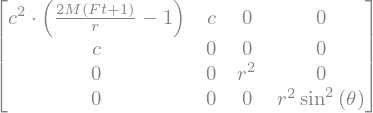

In [21]:
syms = sympy.symbols("t r theta phi")
G, M, c, a, F = sympy.symbols("G M c a F")
a = M*(1 + F*syms[0])
print(a)
# using metric values of schwarschild space-time
# a is schwarzschild radius
list2d = [[0 for i in range(4)] for i in range(4)]
list2d[0][0] = -(1 - (2*a / syms[1]))* (c ** 2)
list2d[0][1] = c
list2d[1][0] = c
list2d[1][1] = 0 
list2d[2][2] = 1 * (syms[1] ** 2) 
list2d[3][3] = 1 * (syms[1] ** 2) * (sympy.sin(syms[2]) ** 2)
sch = MetricTensor(list2d, syms)
sch.tensor()


### Calculating the Einstein Tensor (with both indices covariant)

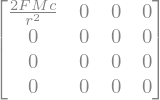

In [22]:
einst = EinsteinTensor.from_metric(sch)
einst.simplify()
einst.tensor()
#components explanation EG https://physics.stackexchange.com/questions/366560/stress-energy-tensor-components-spherical-coordinates

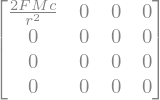

In [23]:
ri = RicciTensor.from_metric(sch)
ri.simplify()
ri.tensor()
#components explanation EG https://physics.stackexchange.com/questions/366560/stress-energy-tensor-components-spherical-coordinates

In [24]:
# Ricci scalar
R = RicciScalar.from_riccitensor(ri)
R.simplify()
R.expr




In [25]:
# what is the Weyl tensor?
#weyl = WeylTensor.from_metric(sch)
#weyl.tensor() # all components!

(t, r, theta, phi, F, M, c)
<function _lambdifygenerated at 0x12e5faa20>


Text(0.5, 1.0, 'T_01')

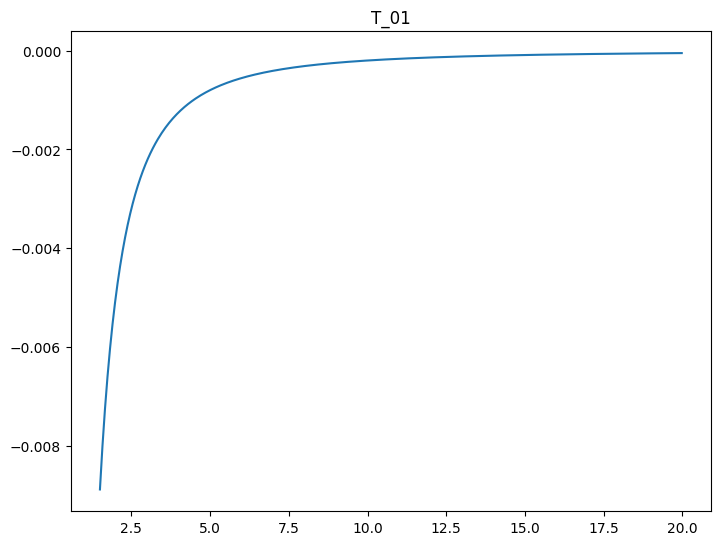

In [26]:
###Plot something
# first make the tensor into a function, printing 
args, func = einst.tensor_lambdify()
print(args) # these are the argument values 
print(func) # these are the argument values 

#Make x values - which we will sub in for r 
x = np.arange(1.5, 20.0, 0.04)
#print(x)
# Call the functions only one non zero component. which is 00, but remember that 00 is like u = t-r
z = []
for x_val in x:
    z.append(-func(1.0,x_val,1, 1, 0.01, 1, 1)[0][0])
fig=plt.figure()
ax=fig.add_axes([0,2,1.0,1.0])
#ax.plot(x,y)
ax.plot(x,z)
ax.set_title("T_01")


